In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

invoices = pd.read_csv('fct_invoice.csv')
customers = pd.read_json('dim_customer.json')

# Easy

1. How many unique customers are in the dataset?

In [43]:
invoices['customer_id'].nunique()

5191

2. What are the different categories of products available? How many unique categories are there?

In [49]:
print("Different Categories of Products Available:")
for i in invoices['category'].unique():
    print(i)
print("\nUnique Categories:")
print(invoices['category'].nunique())

Different Categories of Products Available:
Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir

Unique Categories:
8


3. Which payment method is the most popular? How many times was it used?

In [55]:
invoices['payment_method'].value_counts().head(1)

Cash    44447
Name: payment_method, dtype: int64

# Medium

1. What are the three most popular categories, by total sales?

In [59]:
invoices['category'].value_counts().head(3)

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Name: category, dtype: int64

2. What are the total sales attributed to customers over the age of 45?

In [87]:
customers.rename(columns={"id":"customer_id"})
merged = pd.merge(invoices,customers,left_on="customer_id",right_on="id")
age_and_id = merged[['age','id']]
age = age_and_id['age']
age_is_45_above = age > 45
merged[age_is_45_above].shape[0]

32627

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

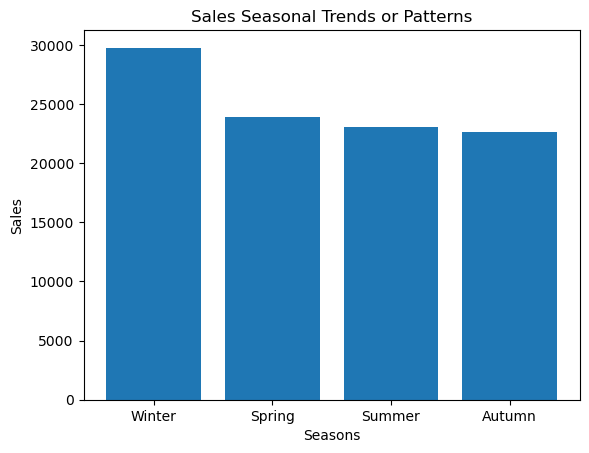

In [122]:
invoices['invoice_date'] = pd.DatetimeIndex(invoices['invoice_date'], dayfirst = True)
invoices['month'] = pd.DatetimeIndex(invoices['invoice_date']).month

conditions = [
    (invoices['month'].isin([12, 1, 2])),
    (invoices['month'].isin([3, 4, 5])),
    (invoices['month'].isin([6, 7, 8])),
    (invoices['month'].isin([9, 10, 11]))
]

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

invoices['season'] = np.select(conditions, seasons)

sales = list(invoices['season'].value_counts())

plt.bar(seasons,sales)

plt.xlabel('Seasons')
plt.ylabel('Sales')
plt.title('Sales Seasonal Trends or Patterns')

plt.show()

# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [123]:
decades = pd.cut(merged['age'],bins = range(10, 101, 10),right = False)
merged.pivot_table(index = "category",columns = decades,values = "quantity",aggfunc = "sum")

age,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
category,,,,,,,,,
Books,229,1427,1518,1542,1364,1420,1019,500,0
Clothing,1727,9392,10247,10220,9343,9700,7055,4095,0
Cosmetics,730,4060,4871,4460,3958,4344,2807,1752,0
Food & Beverage,697,3906,4540,4677,3824,4243,2862,1637,0
Shoes,457,2716,3186,3148,2652,2696,2017,1180,0
Souvenir,281,1304,1496,1514,1286,1307,903,558,0
Technology,274,1359,1590,1553,1162,1457,931,522,0
Toys,480,2859,3217,2983,2626,2797,2078,1201,0
